In [1]:
#  Binary Classification
# binary_classification.py
# This script demonstrates a simple binary classification task.
# There are only two possible outcome classes.
# Examples include spam detection (spam or not spam) and disease diagnosis (disease or no disease).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# --- 1. Prepare Classification Data ---
# X: Independent variables (Age, BMI)
# y: Dependent variable (Disease: 1=Yes, 0=No)
data = {
    "Age": [25, 30, 50, 65, 35, 40, 55, 20, 70, 45],
    "BMI": [22, 28, 35, 30, 24, 29, 38, 20, 32, 25],
    "Disease": [0, 0, 1, 1, 0, 1, 1, 0, 1, 0],  # The discrete categories
}
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[["Age", "BMI"]]  # Two features
y = df["Disease"]  # Binary target (0 or 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
# --- 2. Train the Model ---
# Logistic Regression is a popular classifier for binary problems
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
# --- 3. Make Predictions ---
# Predict the disease status for the test set
y_pred = model.predict(X_test)

# Predict the probability of disease for the test set
y_proba = model.predict_proba(X_test)[:, 1]

In [6]:
# --- 4. Evaluate the Model ---
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Predicted Classes on Test Data: {y_pred}")
print(f"Actual Classes on Test Data:    {y_test.values}")
print("-" * 35)
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Predicted Classes on Test Data: [1 0 0]
Actual Classes on Test Data:    [1 0 1]
-----------------------------------
Model Accuracy: 0.67
Confusion Matrix:
[[1 0]
 [1 1]]


In [7]:
# --- 5. Example Prediction ---
new_patient = pd.DataFrame({"Age": [60], "BMI": [35]})
prediction = model.predict(new_patient)
probability = model.predict_proba(new_patient)[:, 1]

print(
    f"\nNew Patient (Age 60, BMI 35) Prediction: {'Disease' if prediction[0] == 1 else 'No Disease'}"
)
print(f"Probability of Disease: {probability[0]:.2f}")


New Patient (Age 60, BMI 35) Prediction: Disease
Probability of Disease: 1.00


In [8]:
df = pd.DataFrame(data)

X = df[["Age", "BMI"]]
y = df["Disease"]

# Use the full dataset for the boundary visualization to show the full picture
# (Training/Test split is usually skipped for simple visualization)
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# --- 2. Create the Meshgrid ---
# Define the range for each feature with a small margin
age_min, age_max = X["Age"].min() - 5, X["Age"].max() + 5
bmi_min, bmi_max = X["BMI"].min() - 5, X["BMI"].max() + 5

# Create a grid of points (e.g., 200x200)
xx, yy = np.meshgrid(
    np.linspace(age_min, age_max, 200), np.linspace(bmi_min, bmi_max, 200)
)

# Flatten the grid to make predictions
Z_input = np.c_[xx.ravel(), yy.ravel()]
# Convert grid to a DataFrame with the same column names used during training
# This avoids the scikit-learn warning: 'X does not have valid feature names'
Z_input_df = pd.DataFrame(Z_input, columns=X.columns)

# --- 3. Predict Classes for the Entire Grid ---
Z = model.predict(Z_input_df)
# Reshape the predictions back into the grid shape
Z = Z.reshape(xx.shape)

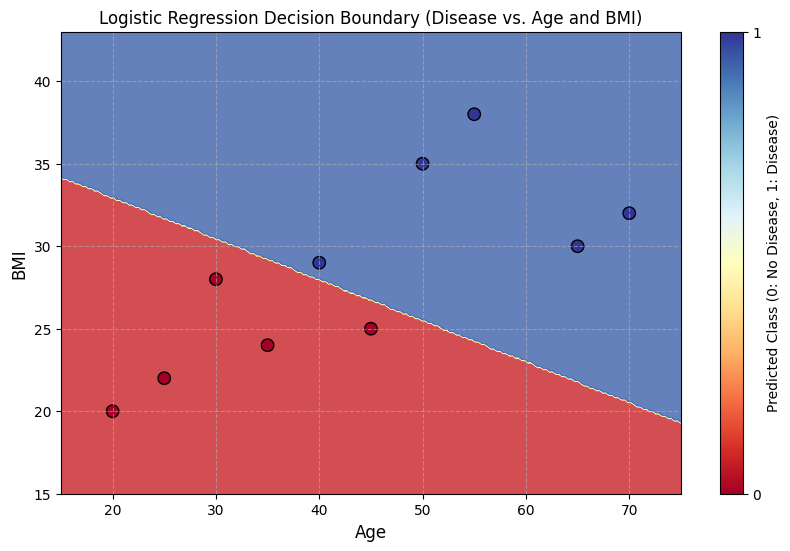

In [10]:
# --- 4. Visualize the Boundary and Data Points ---
plt.figure(figsize=(10, 6))

# Plot the colored regions (the decision boundary)
# The 'cmap' (color map) colors the regions based on the predicted class (0 or 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the actual data points (scatter plot)
# 'c=y' colors the points based on their actual class
plt.scatter(X["Age"], X["BMI"], c=y, edgecolors="k", cmap=plt.cm.RdYlBu, s=80)

plt.xlabel("Age", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.title("Logistic Regression Decision Boundary (Disease vs. Age and BMI)")
plt.colorbar(ticks=[0, 1], label="Predicted Class (0: No Disease, 1: Disease)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()